<a href="https://colab.research.google.com/github/carmen-chan/A2/blob/master/Testing_area_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
##Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Import dataset from Github repository 
url = 'https://raw.githubusercontent.com/carmen-chan/A2/master/WA_Fn-UseC_-Telco-Customer-Churn.csv'
telco = pd.read_csv(url, error_bad_lines=False)

# Check column names 
list(telco.head())

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [13]:
## Examining the first five rows of data
print(telco.head())

## For numeric attributes find the general mathematic summarising data
telco.describe()



   customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95       1889.5     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3  7795-CFOCW    Male              0  ...          42.30      1840.75     No
4  9237-HQITU  Female              0  ...          70.70       151.65    Yes

[5 rows x 21 columns]


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [0]:
## Renaming Columns

telco.columns = ['CustomerID', 'Gender', 'SeniorCitizen', 'Partner','Dependents', 'TenureMonths',  'PhoneService',  'MultipleLines',  'InternetService',  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'ContractTerm', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'MonthlyChurn']

In [15]:
telco.dtypes

CustomerID           object
Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
TenureMonths          int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
ContractTerm         object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
MonthlyChurn         object
dtype: object

Data cleaning

In [17]:
# Categorical boolean mask
categorical_feature_mask = telco.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = telco.columns[categorical_feature_mask].tolist()

# import labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# apply le on categorical feature columns
telco['Partner'] = telco['Partner'].apply(lambda col: le.fit_transform(col))
telco[categorical_cols].head(10)

ValueError: ignored

In [0]:
def Gender_categorised(x):
  if x=='Male':
      return 0
  if x=='Female':
      return 1

def Binarise(x):
  if x=='No':
      return 0
  if x=='Yes':
      return 1
    
def MultipleLines_Cat(x):
  if x=='No Phone Service':
    return 0
  if x=='No':
    return 1
  if x=='Yes':
    return 2
    


In [0]:
telco['Gender2'] = telco['Gender'].apply(Gender_categorised)

telco['Partner2'] = telco['Partner'].apply(Binarise)

telco['Dependents2'] = telco['Dependents'].apply(Binarise)

telco['PhoneService2'] = telco['PhoneService'].apply(Binarise)

telco['OnlineSecurity2'] = telco['OnlineSecurity'].apply(Binarise)

telco['OnlineBackup2'] = telco['OnlineBackup'].apply(Binarise)

telco['DeviceProtection2'] = telco['DeviceProtection'].apply(Binarise)

telco['TechSupport2'] = telco['TechSupport'].apply(Binarise)

telco['StreamingTV2'] = telco['StreamingTV'].apply(Binarise)

telco['StreamingMovies2'] = telco['StreamingMovies'].apply(Binarise)

telco['PaperlessBilling2'] = telco['PaperlessBilling'].apply(Binarise)

telco['MultipleLines2'] = telco['MultipleLines'].apply(MultipleLines_Cat)

telco

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ContractTerm,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MonthlyChurn,Gender2,Partner2,PhoneService2,OnlineSecurity2,OnlineBackup2,DeviceProtection2,TechSupport2,StreamingTV2,StreamingMovies2,PaperlessBilling2,Dependents2,MultipleLines2
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,1,0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,NaN
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,0,0,1.0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,0,1,1.0,1.0,0.0,0.0,0.0,0.0,1,0,1.0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,0,0,1.0,0.0,1.0,1.0,0.0,0.0,0,0,NaN
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1.0
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,0,1,0.0,0.0,1.0,0.0,1.0,1.0,1,0,2.0
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,0,0,1,0.0,1.0,0.0,0.0,1.0,0.0,1,1,2.0
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,NaN
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,1,1,0.0,0.0,1.0,1.0,1.0,1.0,1,0,2.0
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,0,0,1,1.0,1.0,0.0,0.0,0.0,0.0,0,1,1.0


Testing area for classifiers 

First - Decision tree

In [0]:
## Import decision tree classifier package and metrics to evaluate on.

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [0]:
predictor_cols = ['Gender2', 'SeniorCitizen', 'Partner2','Dependents2', 'TenureMonths',  'PhoneService2',  'MultipleLines2',  'InternetService',  'OnlineSecurity2', 'OnlineBackup2', 'DeviceProtection2', 'TechSupport2', 'StreamingTV2', 'StreamingMovies2', 'ContractTerm', 'PaperlessBilling2', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
X = telco[predictor_cols]
y = telco.MonthlyChurn

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [0]:
dtC = DecisionTreeClassifier(criterion="entropy", max_depth=7)

dtC = dtC.fit(X_train,y_train)

y_pred_dtC = dtC.predict(X_test)

print("Accuracy of decision tree classifier:",metrics.accuracy_score(y_test, y_pred_dtC))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_dtC))

ValueError: ignored

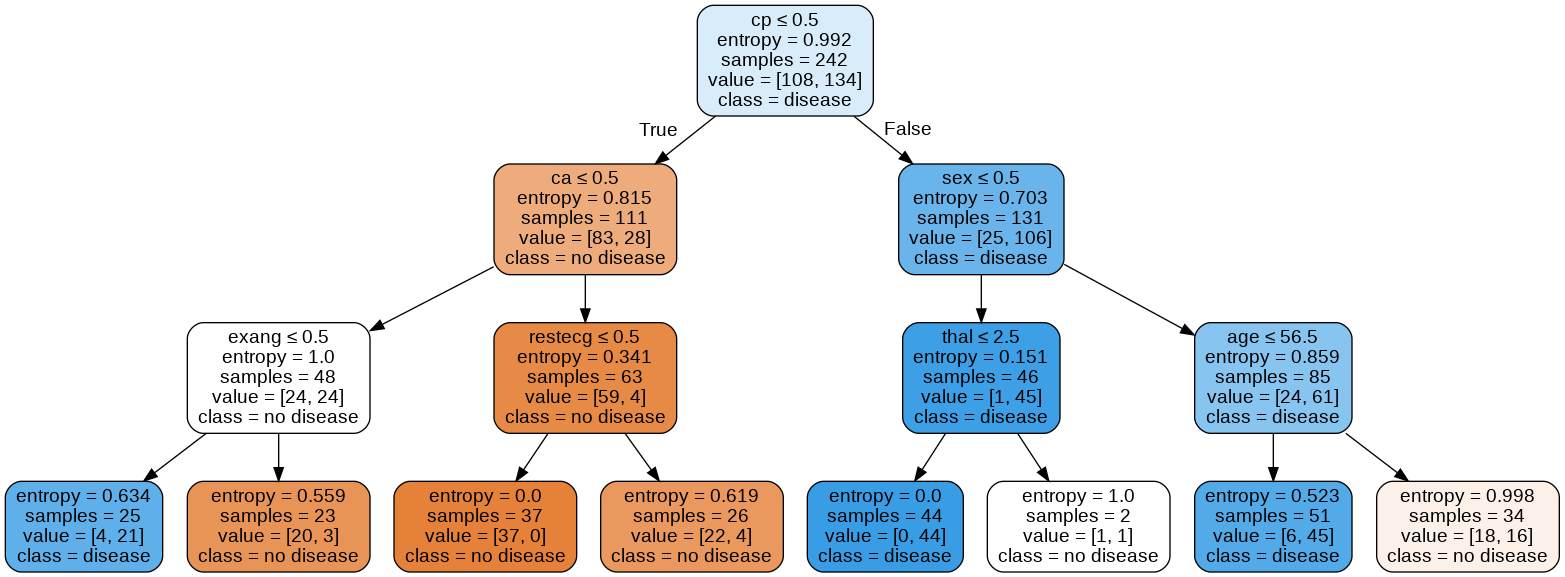

In [0]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dtC, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = predictor_cols,class_names=['no disease','disease'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('heartdtC.png')
Image(graph.create_png())

Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(n_estimators=50, random_state=1)
randomforest.fit(X_train, y_train)
y_pred_randomforest = randomforest.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred_randomforest))
print(classification_report(y_test,y_pred_randomforest))
print("Accuracy of random forest classifier:", accuracy_score(y_test, y_pred_randomforest))

[[21  9]
 [ 3 28]]
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.76      0.90      0.82        31

    accuracy                           0.80        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

Accuracy of random forest classifier: 0.8032786885245902


Linear SVM

In [0]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

y_pred_SVM = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_SVM))
print(classification_report(y_test,y_pred_SVM))
print("Accuracy of SVM classifier:", accuracy_score(y_test, y_pred_SVM))

[[20 10]
 [ 6 25]]
              precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.71      0.81      0.76        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61

Accuracy of SVM classifier: 0.7377049180327869


Kernel SVM

In [0]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)

y_pred_SVC = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_SVC))
print(classification_report(y_test,y_pred_SVC))
print("Accuracy of SVC classifier:", accuracy_score(y_test, y_pred_SVC))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
